In [37]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pyodbc
import pandas as pd

In [2]:
cnxn_str = ("Driver={ODBC Driver 17 for SQL Server};"

            "Server=DESKTOP-VQFAPB4;"

            "Database=DW_SupplyChain;"

            "Trusted_Connection=yes;")

In [3]:
cnxn = pyodbc.connect(cnxn_str)

In [4]:
# Load data
query = """
SELECT 
    p.ProductPK, 
    p.productid, 
    b.brandname AS Product_Brand, 
    c.Category, 
    f.unit_price, 
    SUM(f.Total__TND) AS Total_Sales, 
    SUM(f.Quantity) AS Total_Quantity
FROM Fact_sales f
JOIN dim_product p ON f.ProductFK = p.ProductPK
JOIN dim_brand b ON f.BrandFK = b.brandPK
JOIN dim_category_brand c ON b.Category_FK = c.Category_PK
GROUP BY p.ProductPK, p.productid, b.brandname, f.unit_price, c.Category;
"""


In [5]:
df = pd.read_sql(query, cnxn)

# Check data
print(df.head())

   ProductPK productid               Product_Brand   Category  unit_price  \
0          2    PR-001                Walker Group  Fragrance  140.300003   
1          5    PR-002      Lyons, Zuniga and Wolf     Makeup  188.460007   
2          9    PR-003             Rogers-Thompson   Skincare  165.199997   
3         10    PR-004              Lewis and Sons   Bodycare  145.529999   
4         15    PR-005  Anthony, Colon and Jimenez   Skincare  102.370003   

    Total_Sales  Total_Quantity  
0  40967.601028             292  
1  67468.681427             358  
2  45429.999298             275  
3  49334.670044             339  
4  36238.981049             354  


C:\Users\PC HP 1\AppData\Local\Temp\ipykernel_21516\2125270516.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


In [6]:
import pandas as pd

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Product_Brand', 'Category'], drop_first=True)

# Display first rows
print(df_encoded.head())

   ProductPK productid  unit_price   Total_Sales  Total_Quantity  \
0          2    PR-001  140.300003  40967.601028             292   
1          5    PR-002  188.460007  67468.681427             358   
2          9    PR-003  165.199997  45429.999298             275   
3         10    PR-004  145.529999  49334.670044             339   
4         15    PR-005  102.370003  36238.981049             354   

   Product_Brand_Adams-Ellison  Product_Brand_Alexander-Gaines  \
0                        False                           False   
1                        False                           False   
2                        False                           False   
3                        False                           False   
4                        False                           False   

   Product_Brand_Allen LLC  Product_Brand_Allen, Smith and Gordon  \
0                    False                                  False   
1                    False                              

In [7]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['unit_price', 'Total_Sales', 'Total_Quantity']

# Initialize and apply scaler
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print(df_encoded.head())

   ProductPK productid  unit_price  Total_Sales  Total_Quantity  \
0          2    PR-001    0.685511     0.300395       -0.670339   
1          5    PR-002    1.557523     1.589788        0.277453   
2          9    PR-003    1.136364     0.517510       -0.914467   
3         10    PR-004    0.780208     0.707489        0.004603   
4         15    PR-005   -0.001271     0.070327        0.220011   

   Product_Brand_Adams-Ellison  Product_Brand_Alexander-Gaines  \
0                        False                           False   
1                        False                           False   
2                        False                           False   
3                        False                           False   
4                        False                           False   

   Product_Brand_Allen LLC  Product_Brand_Allen, Smith and Gordon  \
0                    False                                  False   
1                    False                                  Fa

C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

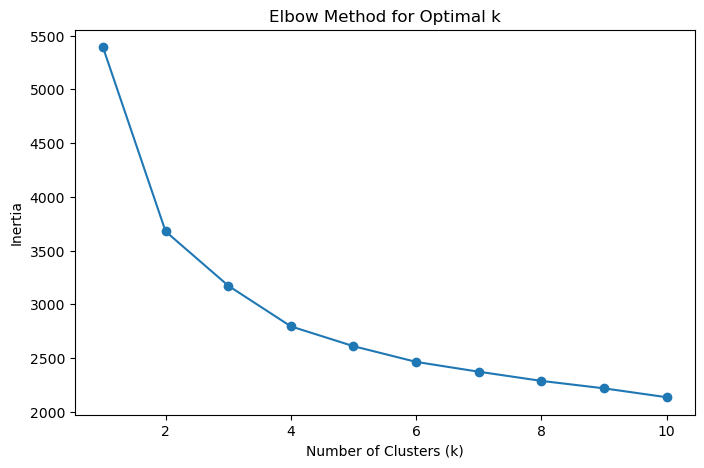

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)  # Testing k=1 to k=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded.drop(columns=['ProductPK', 'productid']))
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
from sklearn.cluster import KMeans

# Apply K-Means with k = x (elbow point)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_encoded['Cluster_KMeans'] = kmeans.fit_predict(df_encoded.drop(columns=['ProductPK', 'productid']))

# Check assigned clusters
print(df_encoded[['productid', 'Cluster_KMeans']].head())

C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


  productid  Cluster_KMeans
0    PR-001               1
1    PR-002               1
2    PR-003               1
3    PR-004               1
4    PR-005               1


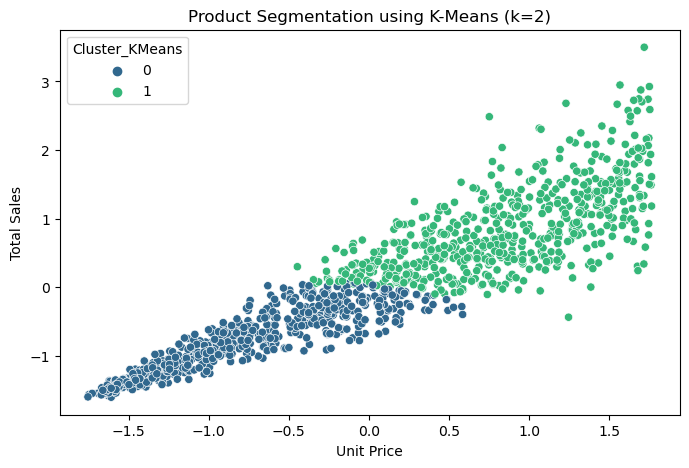

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_encoded['unit_price'], y=df_encoded['Total_Sales'], hue=df_encoded['Cluster_KMeans'], palette='viridis')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.title('Product Segmentation using K-Means (k=2)')
plt.show()

In [16]:
# from sklearn.metrics import silhouette_score

# best_k = 0
# best_score = -1
# for k in range(2, 11):  # Test k from 2 to 10
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     labels = kmeans.fit_predict(df_scaled)
#     score = silhouette_score(df_scaled, labels)
    
#     print(f"Silhouette Score for k={k}: {score:.4f}")
    
#     if score > best_score:
#         best_k = k
#         best_score = score

# print(f"\n✅ Best k based on Silhouette Score: {best_k} with a score of {best_score:.4f}")


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=2: 0.4127


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=3: 0.3598


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=4: 0.3599


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=5: 0.3574


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=6: 0.3548


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=7: 0.3535


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=8: 0.3499


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=9: 0.3339


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=10: 0.3420

✅ Best k based on Silhouette Score: 2 with a score of 0.4127


In [11]:
# Group products by their assigned cluster
for cluster in sorted(df_encoded['Cluster_KMeans'].unique()):
    print(f"\n Products in Cluster {cluster}:")
    print(df_encoded[df_encoded['Cluster_KMeans'] == cluster]['productid'].values)


 Products in Cluster 0:
['PR-011' 'PR-012' 'PR-014' 'PR-016' 'PR-020' 'PR-021' 'PR-022' 'PR-024'
 'PR-025' 'PR-026' 'PR-030' 'PR-033' 'PR-034' 'PR-035' 'PR-036' 'PR-039'
 'PR-040' 'PR-041' 'PR-042' 'PR-043' 'PR-044' 'PR-045' 'PR-046' 'PR-047'
 'PR-048' 'PR-056' 'PR-057' 'PR-059' 'PR-060' 'PR-062' 'PR-063' 'PR-065'
 'PR-066' 'PR-069' 'PR-070' 'PR-072' 'PR-074' 'PR-075' 'PR-076' 'PR-078'
 'PR-080' 'PR-082' 'PR-084' 'PR-085' 'PR-086' 'PR-089' 'PR-090' 'PR-091'
 'PR-092' 'PR-094' 'PR-097' 'PR-102' 'PR-104' 'PR-108' 'PR-111' 'PR-112'
 'PR-116' 'PR-117' 'PR-122' 'PR-127' 'PR-128' 'PR-129' 'PR-130' 'PR-131'
 'PR-132' 'PR-133' 'PR-134' 'PR-135' 'PR-136' 'PR-137' 'PR-138' 'PR-139'
 'PR-140' 'PR-141' 'PR-143' 'PR-145' 'PR-146' 'PR-147' 'PR-149' 'PR-153'
 'PR-154' 'PR-155' 'PR-157' 'PR-159' 'PR-161' 'PR-162' 'PR-164' 'PR-165'
 'PR-170' 'PR-172' 'PR-173' 'PR-175' 'PR-176' 'PR-178' 'PR-179' 'PR-180'
 'PR-182' 'PR-185' 'PR-186' 'PR-190' 'PR-191' 'PR-198' 'PR-203' 'PR-211'
 'PR-213' 'PR-215' 'PR-217

In [12]:
df_encoded[['productid', 'Cluster_KMeans']].to_csv('product_clusters.csv', index=False)
print("✅ Clustered products saved to 'product_clusters.csv'")

✅ Clustered products saved to 'product_clusters.csv'


In [13]:
for cluster in sorted(df_encoded['Cluster_KMeans'].unique()):
    print(f"\n📌 Cluster {cluster}:")
    print(df_encoded[df_encoded['Cluster_KMeans'] == cluster][['productid', 'unit_price', 'Total_Sales', 'Total_Quantity']].head())


📌 Cluster 0:
   productid  unit_price  Total_Sales  Total_Quantity
10    PR-011   -1.656753    -1.525723       -0.354409
11    PR-012   -0.411203    -0.063589        1.167802
13    PR-014   -0.179982    -0.639734       -1.503247
15    PR-016   -0.990794    -0.808258        0.607744
19    PR-020   -1.537069    -1.460602       -0.957549

📌 Cluster 1:
  productid  unit_price  Total_Sales  Total_Quantity
0    PR-001    0.685511     0.300395       -0.670339
1    PR-002    1.557523     1.589788        0.277453
2    PR-003    1.136364     0.517510       -0.914467
3    PR-004    0.780208     0.707489        0.004603
4    PR-005   -0.001271     0.070327        0.220011


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Make sure to select only the features used for clustering
features = ['unit_price', 'Total_Sales', 'Total_Quantity']
X = df_encoded[features]

# Scale them
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# Then calculate the silhouette score
sil_score = silhouette_score(df_scaled, df_encoded['Cluster_KMeans'])
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.4126


In [17]:
pip install scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# from sklearn.mixture import GaussianMixture
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assuming `df_encoded` already exists and includes your product data
# # and you've already one-hot-encoded and prepared it

# # 🔹 1. Feature selection
# features = ['unit_price', 'Total_Sales', 'Total_Quantity']
# df_features = df_encoded[features]

# # 🔹 2. Scaling
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_features)

# # Helper function to visualize clusters
# def plot_clusters(X, labels, title):
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis')
#     plt.title(title)
#     plt.xlabel('unit_price')
#     plt.ylabel('Total_Sales')
#     plt.show()

# # 🔹 3. K-Means
# kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
# kmeans_labels = kmeans.fit_predict(df_scaled)
# kmeans_score = silhouette_score(df_scaled, kmeans_labels)
# print(f"K-Means Silhouette Score: {kmeans_score:.4f}")
# plot_clusters(df_scaled, kmeans_labels, "K-Means Clustering (k=2)")

# # 🔹 4. Agglomerative Clustering
# agg = AgglomerativeClustering(n_clusters=2)
# agg_labels = agg.fit_predict(df_scaled)
# agg_score = silhouette_score(df_scaled, agg_labels)
# print(f"Agglomerative Clustering Silhouette Score: {agg_score:.4f}")
# plot_clusters(df_scaled, agg_labels, "Agglomerative Clustering (k=2)")

# # 🔹 5. DBSCAN
# dbscan = DBSCAN(eps=1.2, min_samples=5)
# dbscan_labels = dbscan.fit_predict(df_scaled)

# # Filter -1 labels (noise) for silhouette score
# if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
#     dbscan_score = silhouette_score(df_scaled, dbscan_labels)
# else:
#     dbscan_score = "N/A (Too much noise or only 1 cluster)"
# print(f"DBSCAN Silhouette Score: {dbscan_score}")
# plot_clusters(df_scaled, dbscan_labels, "DBSCAN Clustering")

# # 🔹 6. Gaussian Mixture Model
# gmm = GaussianMixture(n_components=2, random_state=42)
# gmm_labels = gmm.fit_predict(df_scaled)
# gmm_score = silhouette_score(df_scaled, gmm_labels)
# print(f"Gaussian Mixture Model Silhouette Score: {gmm_score:.4f}")
# plot_clusters(df_scaled, gmm_labels, "GMM Clustering (k=2)")